# California Housing Price Prediction

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
!dir | findstr -i housing.csv

07-05-2023  15:38         1,423,529 housing.csv


In [7]:
housing = pd.read_csv('housing.csv')
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


207 values of 'total_bedrooms' is missing

In [12]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


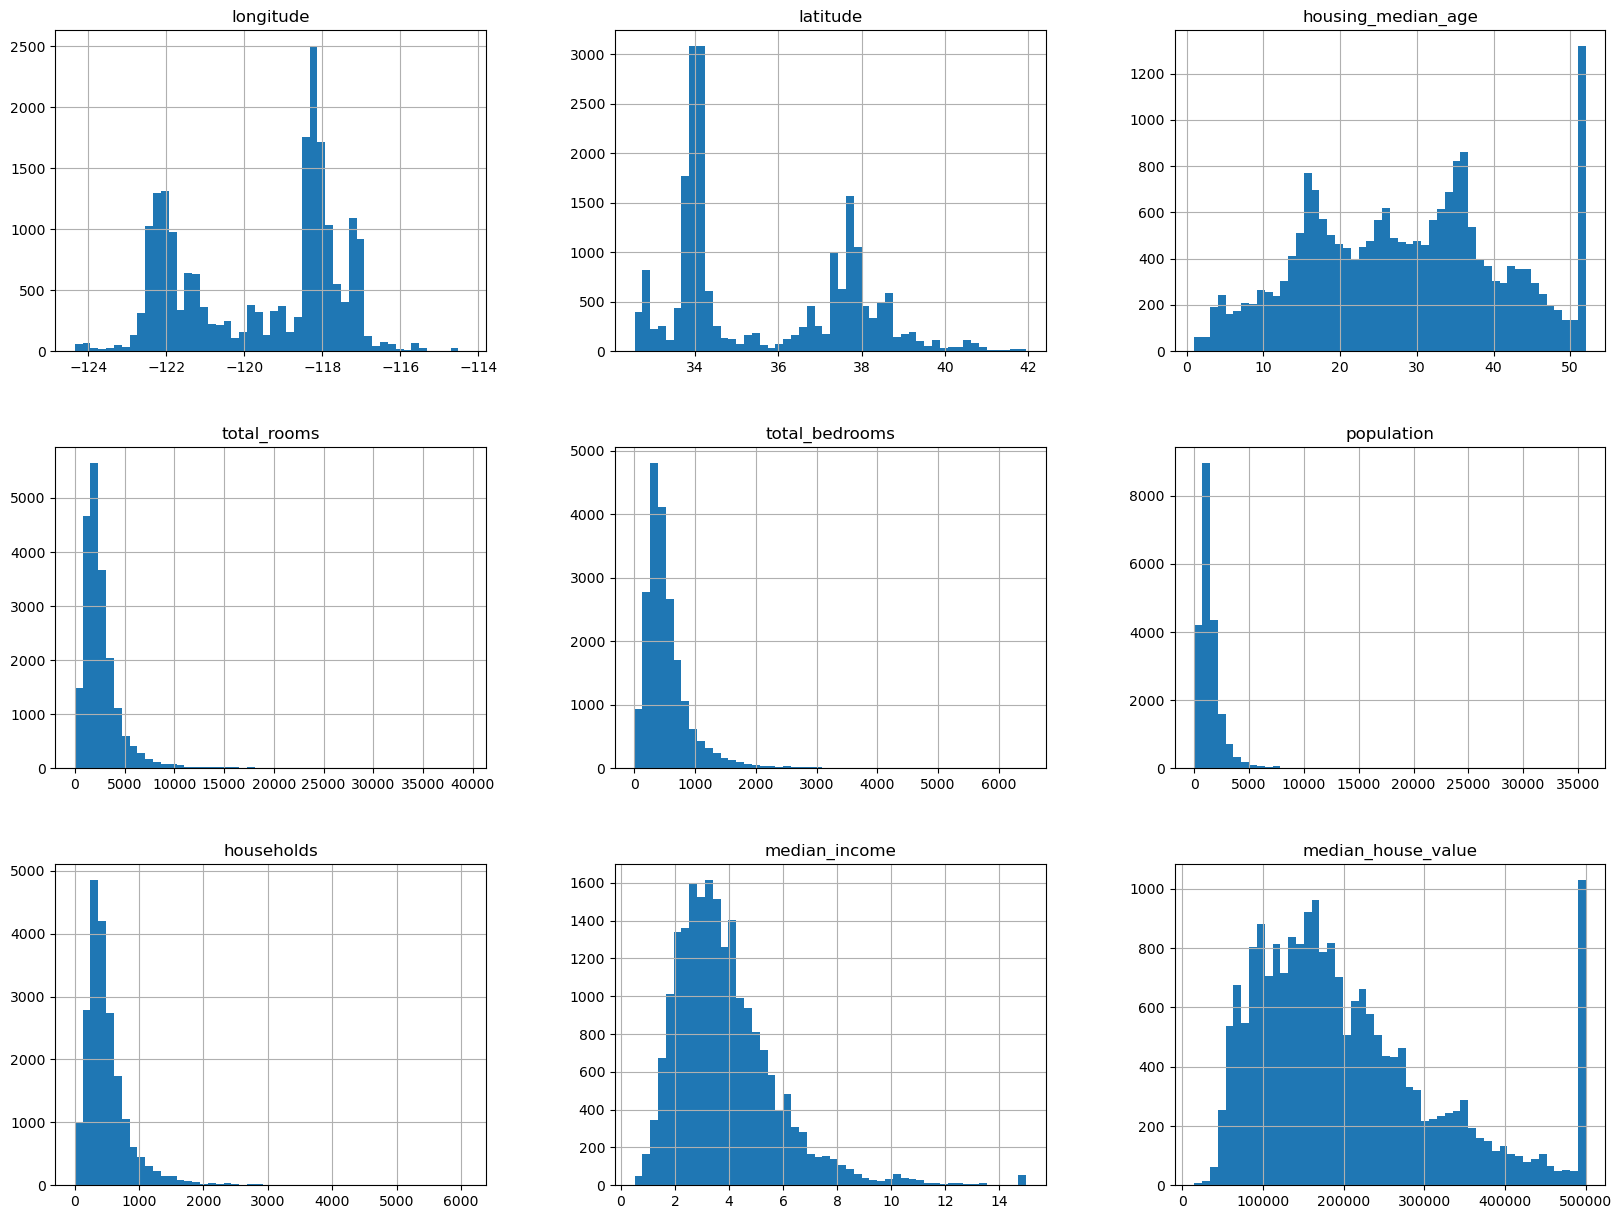

In [18]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

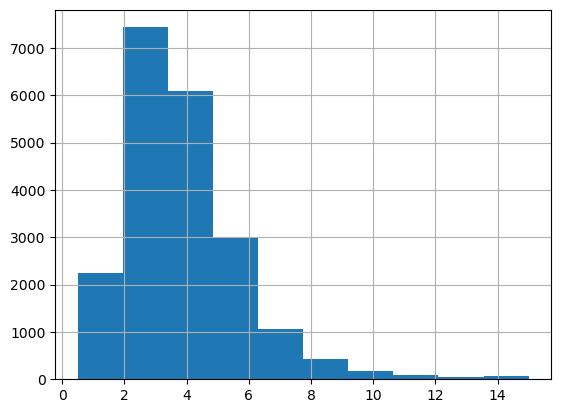

In [20]:
#median incom is an important feature

housing['median_income'].hist()

In [22]:
#dividing the income category to limit the number income category
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
#putting everything above 5th category as 5th category
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace= True)

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= 29)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [25]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [26]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set) 

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

**as seen above the proportions are maintained in the test set using stratified sampling**

[**why stratified?**] : because the feature-space are less and also becuase its a mid-size dataset and we dont want to miss out any class

In [27]:
for items in (strat_train_set, strat_test_set):
    items.drop("income_cat", axis=1, inplace=True)

In [28]:
housing = strat_train_set.copy()

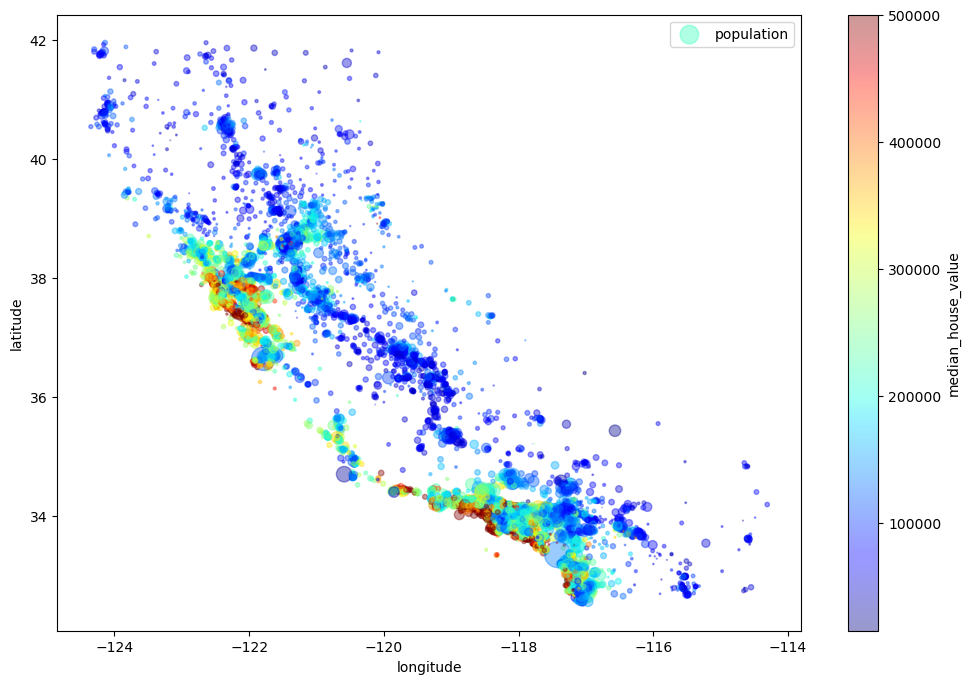

In [31]:
housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"),sharex=False)

plt.legend()

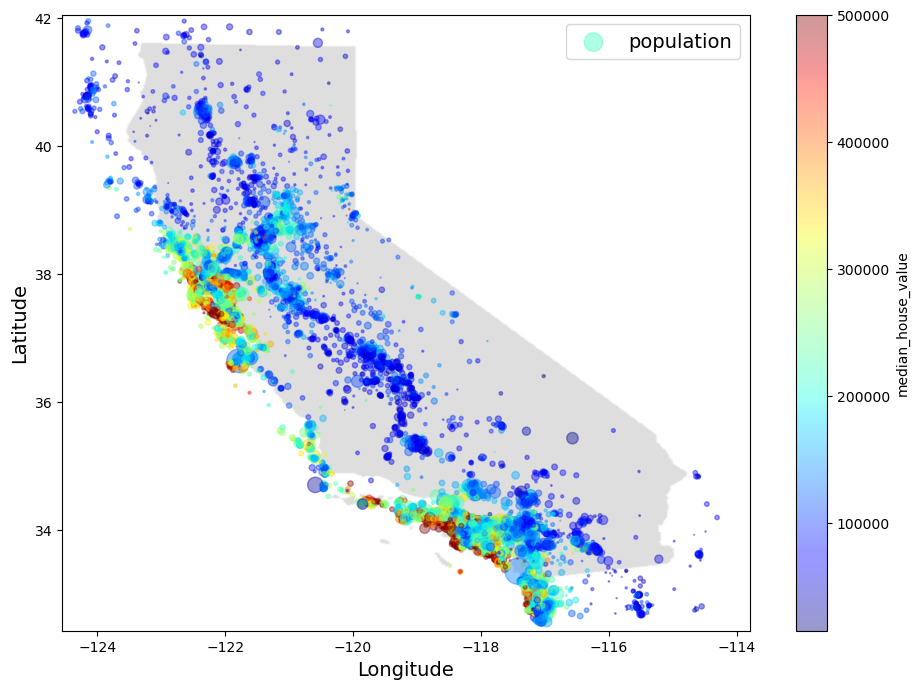

In [47]:
import matplotlib.image as mpimg
ax = housing.plot(kind="scatter",x="longitude",y="latitude", alpha=0.4,
            s=housing["population"]/100,label="population",figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"),sharex=False)
california_img = mpimg.imread("california.png")
plt.imshow(california_img, extent=[-124.55, -113.8, 32.42, 42.05], alpha=0.5,cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude",fontsize=14)

plt.legend(fontsize=14)
plt.show()

### Looking for Correlation
(Pearson's Distance Correlation equation)

In [50]:
#using Pandas corr method
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691334
total_rooms           0.127498
housing_median_age    0.108481
households            0.060161
total_bedrooms        0.043991
population           -0.028239
longitude            -0.043977
latitude             -0.146227
Name: median_house_value, dtype: float64

always between -1 and 1 

## Feature Engineering

In [52]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]


In [53]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691334
rooms_per_household         0.151990
total_rooms                 0.127498
housing_median_age          0.108481
households                  0.060161
total_bedrooms              0.043991
population_per_household   -0.021681
population                 -0.028239
longitude                  -0.043977
latitude                   -0.146227
bedrooms_per_room          -0.254016
Name: median_house_value, dtype: float64

**[observation]:** the new `bedrooms_per_room` is highly correlated but in a reciprocated way to the `median_house_value`, so the houses with lesser bedroom/room ratio will tend to be more expensive.

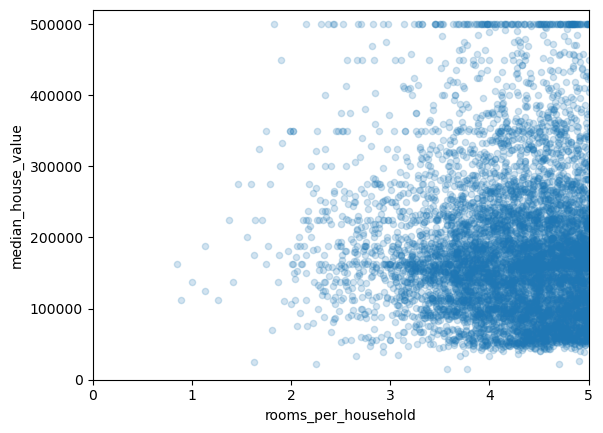

In [55]:
housing.plot(kind='scatter', x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0,5,0,520000])
plt.show()

In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574918,35.643021,28.655947,2622.391231,535.213224,1418.527798,496.885841,3.870790,206426.578428,0.212956,3.103945,5.434839
std,2.005139,2.142811,12.534525,2171.363228,421.124070,1137.469909,382.194131,1.903757,115101.402421,0.058306,11.603188,2.520729
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.750000,279.000000,2.559950,119175.000000,0.175447,2.434051,4.443640
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.533000,179650.000000,0.202963,2.817634,5.230475
75%,-118.010000,37.720000,37.000000,3122.000000,641.000000,1715.000000,599.000000,4.739600,264700.000000,0.239314,3.273248,6.056697
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


# Preparing the data for ML algorithms

In [57]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### some data cleansing

In [58]:
#using scikit-Learn's Imputer class
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [59]:
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [62]:
imputer.statistics_  #to see across all attributes using statistics method

array([-118.5  ,   34.26 ,   29.   , 2123.   ,  433.   , 1159.   ,
        407.   ,    3.533])

using imputer we created above,transforming the training set by replacing the missing values by the learned medians

In [63]:
X = imputer.transform(housing_num)

In [64]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [67]:
#cross-check for missing value
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [68]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.11,33.85,36.0,887.0,163.0,482.0,157.0,4.1250
1,-122.04,37.33,26.0,2690.0,401.0,1264.0,429.0,7.7643
2,-117.74,34.10,29.0,2742.0,488.0,2477.0,532.0,3.5072
3,-118.39,34.23,43.0,1193.0,299.0,1184.0,320.0,2.1518
4,-117.11,32.76,21.0,2226.0,600.0,1085.0,533.0,2.2604


### handling categorical values

In [70]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

8007      <1H OCEAN
18096     <1H OCEAN
5981         INLAND
3669      <1H OCEAN
14092    NEAR OCEAN
15992      NEAR BAY
10537     <1H OCEAN
6544      <1H OCEAN
948       <1H OCEAN
6193      <1H OCEAN
Name: ocean_proximity, dtype: object

In [71]:
# panda's own factorize method to convert into categorical features
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [78]:
housing_cat_encoded[:10]

array([0, 0, 1, 0, 2, 3, 0, 0, 0, 0], dtype=int64)

In [73]:
housing_categories

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [79]:
#using Scikit-Learn's OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1,-1))

In [80]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [81]:
#since 1 hot encoder returns sparse matrix we convert it to a dense array
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

### Custom Transformations

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

#column indicies
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [89]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room =False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [90]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household","population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.11,33.85,36.0,887.0,163.0,482.0,157.0,4.125,<1H OCEAN,5.649682,3.070064
1,-122.04,37.33,26.0,2690.0,401.0,1264.0,429.0,7.7643,<1H OCEAN,6.270396,2.946387
2,-117.74,34.1,29.0,2742.0,488.0,2477.0,532.0,3.5072,INLAND,5.154135,4.656015
3,-118.39,34.23,43.0,1193.0,299.0,1184.0,320.0,2.1518,<1H OCEAN,3.728125,3.7
4,-117.11,32.76,21.0,2226.0,600.0,1085.0,533.0,2.2604,NEAR OCEAN,4.17636,2.035647


## Setting up Pipeline for all preprocessings

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("Imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.08523298,
        -0.00292009, -0.45066285],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.33148459,
        -0.01357928, -0.97149216],
       [ 0.91513496, -0.72011354,  0.02744924, ..., -0.11136143,
         0.13376642, -0.53762897],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.13786673,
        -0.02720971, -0.4451879 ],
       [ 0.63085685, -0.73878116, -0.37146108, ..., -0.91194187,
        -0.01098173,  1.88075105],
       [-1.30921661,  1.0019753 ,  0.90505196, ..., -0.3666513 ,
        -0.02289502,  0.4161723 ]])

In [93]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X, y=None):
        return X[self.attribute_names].values

In [94]:
#complete pipeline

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("Selector", DataFrameSelector(num_attribs)),
    ("Imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("Selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [95]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [96]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91513496, -0.72011354,  0.02744924, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63085685, -0.73878116, -0.37146108, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30921661,  1.0019753 ,  0.90505196, ...,  0.        ,
         1.        ,  0.        ]])

## Selecting & Training Models

In [97]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [99]:
# trying the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [101]:
print("predicted:", lin_reg.predict(some_data_prepared))
print("Actual Labels:", list(some_labels))

predicted: [232035.89112672 380482.2530773  112115.91222308 157188.4422259
 182226.68776252]
Actual Labels: [219500.0, 474700.0, 121900.0, 161600.0, 126300.0]


In [102]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67932.7700373929

In [114]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [115]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Cross Validation:

In [121]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

tree_rmse_scores = np.sqrt(-tree_scores)

In [122]:
def display_scores(scores):
    print("scores:", scores)
    print("mean: ",scores.mean())
    print("std deviation: ", scores.std())
display_scores(tree_rmse_score)

scores: [68128.93340916 71388.27126195 70480.88065583 71411.98275389
 67275.38569177 70828.10611464 70965.47314437 69015.31323265
 74442.59868368 71199.14159723]
mean:  70513.60865451554
std deviation:  1902.6519179570075


In [124]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

scores: [66658.67084538 70302.86819962 71566.38526718 65233.82017541
 64574.58761208 69256.95688732 66787.77183138 71451.60918566
 65360.54454616 72249.20183707]
mean:  68344.24163872632
std deviation:  2792.9756994233758


In [126]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=29)

In [130]:
housing_pred = forest_reg.predict(housing_prepared)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

scores: [47810.25107843 51241.58204009 51344.54612338 47222.7603412
 47491.26556067 52464.13388224 48163.00514217 48820.31796374
 47462.08506298 51591.93026549]
mean:  49361.18774604013
std deviation:  1946.3745280089033
